In [ ]:

import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

## Pour s'échauffer... ##

quelques grandeurs physiques:
- capacité thermique massique de la roche $c_R$ = 800 J/Kg/K
- capacité thermique massique de l'eau $c_W$ = 1000 J/Kg/K
- masse volumique de la roche $\rho_R$ = 2600 Kg/m3
- masse volumique de l'eau $\rho_w$ = 1000 Kg/m3

1. Quelle quantité d'énergie est perdue lorsqu'on refroidit 10 kilogrammes de roches de 2°C?
2. Quelle quantité d'énergie est perdue lorsqu'on refroidit 10 litres d'eau de 2°C?
3. Une roche a une conductivité thermique $\lambda$ = 1.8 W/m/K. Le flux géothermique moyen est $\phi$ = 64 mW/m2. La température moyenne en surface est $T_{surf}$ = 9.8 °C. Quelle température à la profondeur de 150 mètres peut on estimer en considérant un transfert thermique purement conductif et mono dimensionnel?


In [ ]:
#calcul de la température à 150 metres de profondeur
9.8+(64e-3/1.8*150)

In [ ]:
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

cR =800 #J/Kg/K
cw =4600 #J/Kg/K
rhoR = 2600 #Kg/m3
rhow = 1000 #Kg/m3

ER = cR * 10 * -2
EW = cw * 1e-2 * rhow * -2

print('quantité NRJ 10 Kg de roche:{:.1e} Joules'.format(ER))
print('quantité NRJ 10 Kg eau:{:.1e} Joules'.format(EW))

4. On considère la succession géologique suivante:
- 0 - 50 m: calcaire gréseux (perméabilité intrinsèque moyenne $k_{eq} =$ 1e-13 m2, conductivité thermique $\lambda_{eq} =$ 2.6 W/m/K, masse volumique $\rho =$ 2600 Kg/m3, capacité thermique massique $C_m =$  940 J/Kg/K)
- 50 - 150 m: argile (perméabilité intrinsèque moyenne $k_{eq} =$ 1e-17 m2, conductivité thermique $\lambda_{eq} =$ 0.9 W/m/K, masse volumique $\rho =$ 2600 Kg/m3, capacité thermique massique $C_m =$  895 J/Kg/K)
- 150 - 500 m: calcaire argileux (perméabilité intrinsèque moyenne $k_{eq} =$ 1e-12 m2, conductivité thermique $\lambda_{eq} =$ 1.8 W/m/K, masse volumique $\rho =$ 2400 Kg/m3, capacité thermique massique $C_m =$  917 J/Kg/K)
Tempértature de surface T = 15°C

Tracer le profil de température depuis la surface jusqu'à 500 mètres de profondeur, dans l'hypothèse d'un système purement conductif.

In [ ]:
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

phi = 80e-3 #flux geothermique W/m2
theta_surf = 15 # °C
lbd = np.array([2.6, 0.9, 1.8])

z1 = np.arange(0, 51, 1)
z2 = np.arange(50, 151, 1)
z3 = np.arange(151, 501, 1)

theta_1 = theta_surf + phi * (z1)/lbd[0]
theta_2 = theta_1[50] + phi * (z2-np.max(z1))/lbd[1]
theta_3 = theta_2[100] + phi * (z3-np.max(z2))/lbd[2]

z = np.concatenate((z1,z2,z3),axis=0)
theta = np.concatenate((theta_1,theta_2,theta_3),axis=0)

plt.figure(figsize=(4,8))
plt.title('Evolution des temperatures dans le sol')
plt.xlabel('Température (°C)')
plt.ylabel('Profondeur (m)')
plt.grid()
plt.plot(theta, z, color = 'red', label='flux = 80 mW/m2')
plt.gca().invert_yaxis()
plt.legend()
plt.show()


## Propagation d'un signal thermique dans le sol I ##

On considère un sol homogène à l'équilibre thermique avec la surface à une température $\theta_0 = 10$°C, en l'absence de flux géothermique. La température en surface augmente soudainement de 3 °C.\\
Une solution à l'équation de diffusivité pour un milieu 1D vertical pour la variation de température à la profondeur $z$ au temps $t$ peut s'écrire:
\begin{equation*}
	\Delta \theta(z,t) = \Delta \theta_0 erfc\left({}\frac{z}{2\sqrt{\kappa t}}\right)
\end{equation*}


Le sol est constitué par une formation calcaire dont les propriétés thermiques sont les suivantes:
- conductivité thermique 1.6 W/m/K
- capacité thermique massique 885 J/Kg/K
- masse volumique $\rho = 2600 Kg/m3

Calculer et représenter le profil thermique dans le sous sol jusqu'à 100 mètres de profondeur au bout de 6 mois, 1 an, 5 ans, 10 ans et 50 ans

In [ ]:

import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

cm = 885 #J/kg/K cond. therm. mass. moyenne du sol
rho_m = 2600 #kg/m3 masse vol. du sol
Cm = 2.3e6 #J/m3/K chaleur vol. moyenne du sol
Cw = 4.18e6 #J/m3/K chaleur. therm. moyenne de l'eau
lm = 1.6 # W/m/K cond. therm. moyenne du sol

theta_0 = 13
z = np.linspace(0,100,200)
t = np.array([0.5,1,5,10,50])

#a finaliser avec une boucle pour le graphique complet
#theta = np.zeros(len(z))
#theta[0:] = theta_0 * sp.erfc(z / 2 / np.sqrt(lm / (cm * rho_m) * t[2]*365*86400))
theta_1an = theta_0 * sp.erfc(z / 2 / np.sqrt(lm / (cm * rho_m) * t[1]*365*86400))
theta_5an = theta_0 * sp.erfc(z / 2 / np.sqrt(lm / (cm * rho_m) * t[2]*365*86400))
theta_50an = theta_0 * sp.erfc(z / 2 / np.sqrt(lm / (cm * rho_m) * t[4]*365*86400))

plt.figure(figsize=(4,8))
plt.title('Evolution des temperatures dans le sol')
plt.xlabel('Température (°C)')
plt.ylabel('Profondeur (m)')
plt.grid()
plt.plot(theta_1an,z,color = 'blue', label='{:.1f} ans'.format(t[1]))
plt.plot(theta_5an,z,color = 'red', label='{:.1f} ans'.format(t[2]))
plt.plot(theta_50an,z,color = 'green', label='{:.1f} ans'.format(t[4]))

plt.gca().invert_yaxis()
plt.legend()
plt.show()


Estimer la profondeur de pénétration pour la chaleur issue du rayonnement diurne durant une journée d'été et estimer la profondeur de pénétration pour les températures observées durant la saison d'été.

In [ ]:
kappa = lm/Cm

t_jour = 12 * 3600 # 12h
t_ete = 90 * 86400 # 4 mois "chaud"
 
z_jour = np.pi * np.sqrt(kappa * t_jour)
z_ete = np.pi * np.sqrt(kappa * t_ete)

print('profondeur de penetration diurne = {:.1e} m'.format(z_jour))
print('profondeur de penetration saisonnière = {:.1e} m'.format(z_ete))


## Propagation d'un signal thermique dans le sol II ##

On souhaite estimer les propriétés thermiques d'un sol. On dispose d'un enregistrement journalier de température en surface dans l'air, obtenu à une station météorologique.
On dispose également de quelques mesures de température observées sur 2 sondes de température implantées à 2 profondeurs différentes.

On souhaite utiliser l'équation de diffusivité thermique pour procéder à l'estimation des paramètres.

1. A partir du fichier brut d'observations, représenter les températures observées en surface et en déduire les paramèters descriptifs représentatifs.

In [ ]:

import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

# on utilise un index temporel pour les fonctionnalites "time series" de la bibliotheque Pandas
idx = pd.date_range("2019-04-01", periods=753, freq="d")
theta_mes = pd.DataFrame(
    data={'temp': np.loadtxt("https://raw.githubusercontent.com/larroque852/NB_ENS3_geothermie/main/air_temperature.csv", delimiter=',', usecols=(2,), unpack=True)},
    index=idx)
#qqs fonctionnalités Pandas pour connaitre les données
#theta_mes.info()
#theta_mes.describe()

# Use seaborn style defaults and set the default figure size (pas obligatoire)
#sns.set(rc={'figure.figsize':(11, 4)})

#representation graphique donnees temperature mesurees
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(theta_mes['temp'],marker='o', linestyle='', color='orange', label='Journalier mes.')
ax.set_ylabel('Température (°C)')
ax.grid()
plt.show()
    
theta_mes.describe()

2. 
Proposer un modèle analytique susceptible de représenter les températures observées en surface

In [ ]:
#hypothese modele cosinus --> theta = theta_mean + Acos( wt + lag)
# les parametres doivent etre estimes à partir des donnees --> ajustement manuel

A = 8 #amplitude des variations de temperature à la surface [C]
t0 =  355  #(w = 2pi/t0)  duree d'un cycle de temperature en surface [j]
thetaAir = 14.7 #temperature de l'air moyenne
lag = 180 #dephasage

time = np.linspace(0,753,753)
theta_mod = thetaAir + A * np.cos((2*3.1415/t0)*time + lag)
theta_mod = pd.DataFrame(data={'temp_mod': theta_mod},index=idx)

#representation graphique
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(theta_mes['temp'],marker='o', linestyle='', color='lightblue', label='Journalier mes.')
ax.plot(theta_mes['temp'].resample('M').mean(),marker='o', markersize=6, color = 'b',linestyle='-',
        linewidth=1.5, label='Mensuel réech.')
#traitement basique - reechantillonnage 30 jours (30D) avec valeur moyenne
theta_mes30d=theta_mes.resample('30d').mean()
path_deviation = theta_mes.resample('30d').std()
#encadrement à 95% soit (moyenne +-2 x ecart-type)
ax.fill_between(path_deviation.index, (theta_mes30d-2*path_deviation)["temp"],
                (theta_mes30d+2*path_deviation)["temp"], label='95%', color='b', alpha=.1)
ax.plot(theta_mod, color='red', linestyle='-', label='Modèle périodique')
ax.set_ylabel('Température [C]')
ax.grid()
ax.legend();



3. On dispose de trois sondes qui on permis d'enregistrer l'évolution temporelle de la température à 3 profondeurs différentes:
- 2 mètres: ENS_GEOT_TD_temp_2m.csv
- 8 mètres: ENS_GEOT_TD_temp_8m.csv
- 11 mètres: ENS_GEOT_TD_temp_11m.csv

Les 3 sondes ont été lancées en aquisition le 01/04/2019 avec un index temporel journalier sur une période totale de 753 jours

En supposant en surface un signal périodique de la forme:
$$ T(t) = \bar{T} + A cos\left[{\frac{2 \pi t}{t_0}}\right]$$
avec $\bar{T}$ température moyenne, $t_0$ durée d'un cycle complet de température, la température à la profondeur $z$ peut être exprimée:

$$
T(z,t) = \bar{T} + A exp\left[{-z\sqrt{\frac{\pi}{\kappa t_0}}}\right]cos\left[{\frac{2 \pi t}{t_0} - z\sqrt{\frac{\pi}{\kappa t_0}}}\right]
$$
avec $\kappa$ diffusivité thermique (m2/s)


En vous basant sur la solution à l'équation de diffusivité précédente, estimer les paramètres thermiques du sol

In [ ]:

import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

#chargement des donnees
data11m=np.genfromtxt('https://raw.githubusercontent.com/larroque852/NB_ENS3_geothermie/main/ENS_GEOT_TD_temp_11m.csv',delimiter=',')
data6m=np.genfromtxt('https://raw.githubusercontent.com/larroque852/NB_ENS3_geothermie/main/ENS_GEOT_TD_temp_6m.csv',delimiter=',')
data2m=np.genfromtxt('https://raw.githubusercontent.com/larroque852/NB_ENS3_geothermie/main/ENS_GEOT_TD_temp_2m.csv',delimiter=',')
t2 = data2m[:,0]
theta_2m = data2m[:,1]
t6 = data6m[:,0]
theta_6m = data6m[:,1]
t11 = data11m[:,0]
theta_11m = data11m[:,1]

#####
#parametres du modele en surface atmospherique
A = 8 #amplitude des variations de temperature à la surface [C]
t0 =  355  #(w = 2pi/t0)  duree d'un cycle de temperature en surface [j]
thetaAir = 14.7 #temperature de l'air moyenne
lag = 180 #dephasage
#ajustement manuel des donnees

#creation modele analytique
def theta_sol(alpha,A,t0,thetaG,z,t):
    theta_sol = thetaG + A * np.exp(-z*np.sqrt(3.1415/(alpha * t0)))* np.cos((2*3.1415*t/t0)-z*np.sqrt(3.1415/(alpha*t0)))
    return(theta_sol)

t = np.linspace(0, 730, 731) #index journalier
thetaG = 15.5 #temperature du sol hors influence surface [C]
lbd = 2.6 #conductivite thermique [W/m/C] attention W --> J/s
Svc = 2.3e6 #capacite thermique volumetrique [J/K/m3]
kappa = (lbd/Svc)*24*3600 #diffusivite thermique [m2/j]

curves = [2,6,11] #pour la legende --> doit etre conforme au nombre de courbes tracees
styles = ['-', '--', '-.', ':']
qt = []
for i in curves:
    qt.append(theta_sol(kappa,A,t0,thetaG,i,t));
   
plt.subplots(figsize=(20, 6))

for i in range(len(qt)):
    plt.plot(t, qt[i], styles[i],color='slategrey', label='Modele Profondeur ' + str(curves[i]) + ' m')
    plt.gca().set(title='Profil température saisonnier', ylabel='Température (C)', xlabel='Index Date')
plt.grid()
plt.legend()

plt.plot(t11, theta_11m, '*', color='red')
plt.plot(t6, theta_6m, '*', color='green')
plt.plot(t2, theta_2m, '*', color='blue')
plt.show()

4. Construire un graphique $T = f(z)$ permettant d'estimer l'amplitude des fluctuations temporelles durant une année climatique moyenne

In [ ]:

import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

thetaG = 15.5 #temperature du sol hors influence surface [C]
lbd = 2.6 #conductivite thermique [W/m/C] attention W --> J/s
Svc = 2.3e6 #capacite thermique volumetrique [J/K/m3]
kappa = (lbd/Svc)*24*3600 #diffusivite thermique [m2/j]

z = np.linspace(0, 20, 20)

styles = ['-', '--', '-.', ':']
curves = [91.25,182.5,273.75,365]
qz = []
for i in curves:
   qz.append(theta_sol(kappa,A,t0,thetaG,z,i));

plt.subplots(figsize=(4, 7))
for i in range(len(qz)):
   plt.plot(qz[i], z, styles[i],color='slategrey', label='temps ' + str(curves[i]) + ' j')
#    plt.plot(qz[i], z, styles[i],color='slategrey', label='temps ' + str(curve[i]) + ' j')
   plt.gca().set(title='Profil température saisonnier', ylabel='Profondeur (m)', xlabel='Température (C)')
#plt.legend()
plt.gca().invert_yaxis()

## Fonctionnement standard d'une pompe à chaleur ##
1. **Système en mode "chauffage":** un système de chauffage est basé sur un capteur géothermique en nappe relié à une pompe à chaleur. La température moyenne de l'eau de l'aquifère de surface est de 11°C. Après valorisation, l'eau prélevée est rejetée à l'aquifère à une température de 7°C. La chaleur extraite par le dispositif géothermique est optimisée par la pompe à chaleur afin de délivrer une température $\theta_{in}$ à l'intérieur. La pompe à chaleur a un coefficient de performance COP = 4.

En considérant un débit de pompage Q = 1 L/s, quelle est la puissance délivrable en interne pour chauffer le bâtiment et quelle est la puissance electrique associée nécessaire??

*Réponse*

- Puissance $H$ délivrée par la pompe à chaleur:
$$
H = G + E
$$
avec $G$ puissance de la source géothermique et $E$ puissance électrique
- COP de pompe à chaleur:
$$
COP = \frac{H}{E}
$$

L'énergie $G$ retirée du système géothermal sur aquifère est exprimé:
$$
G= Q \Delta \theta C_w
$$
avec $\Delta \theta = \theta_{out} - \theta_{inj}$ et $C_w$ chaleur volumique de l'eau



In [ ]:
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

theta_out = 11 #temperature pompage (=température aquifère)
theta_inj = 7 #temperature injection
Q = 1e-3 #m3/s
Cw = 4.2e6 #capacite thermique volumetrique eau [J/K/m3]

G = Q * (theta_out - theta_inj) * Cw #joule/s --> watt

print("Puissance produite par le capteur géothermique ={:.2e}".format(G),"J/s")
print("Puissance produite par le capteur géothermique ={:.2e}".format(G/1000),"kW")


A partir de la définition de la COP, on peut exprimer la puissance G:

$$ G = H \left[{1 - \frac{1}{COP}}\right] $$

et donc pour la puissance délivrée $H$:

$$ H = G\left[{1 - \frac{1}{COP}}\right] $$

Comme:

$$ COP = \frac{H}{E} $$

La puissance électrique $E$ s'exprime:

$$ E = \frac{H}{COP} $$


In [ ]:
COP = 4 # performance pompe chaleur

H = G / (1 - 1 / COP)
print("Puissance délivrée par la pompe à chaleur = {:.2e}".format(H/1000),"kW")

E = H / COP
print("Puissance électrique nécessaire pour la pompe à chaleur = {:.2e}".format(E/1000),"kW")


2. **Système en mode "rafraichissement":** on considère un pompage qui fournit un débit Q = 1 L/s d'une eau à la température de $\theta_{out}$ = 10°C. Un "effet froid" peut être obtenu par circulation passive du fluide dans le batiment. Cela se traduit par une augmentation de la température du fluide de 3°C. Quelle est la puissance de rafraichissement du domicile ainsi obtenue? Pour augmenter cet effetd e froid, on utilise une pompe à chaleur de COPc = 5.5 qui permet de valoriser un $\Delta \theta$  = 5 °C. Quelle est la puissance de rafraichissement du domicile obtenue et quelle est la consommation électrique associée?

La puissance de rafraichissement géothermale $C$ peut être définie:
$$
C = Q \Delta \theta C_w
$$
avec $\Delta \theta$ la différence de température entre eau pompée et eau en sortie de circuit de rafraichissement.

In [ ]:
Dtheta1 = 3 # delta temperture rafraichissement sans pompe chaleur
Q = 1e-3 #m3/s
C = Q * Dtheta1 * Cw #joule/s --> watt
print("Puissance rafraichissement C ={:.2e}".format(C),"J/s")
print("Puissance rafraichissement C ={:.2e}".format(C/1000),"kW")



Avec une pompe à chaleur en mode froid, on valorise un $\Delta \theta$  = 5 °C avec une COPc = 5.5.
La puissance de rafraichissement s'exprime:
$$
C = \frac{Q \Delta \theta C_w}{1 + 1/COP_c}
$$


In [ ]:
COPc = 5.5
Dtheta2 = 5
C = Q * Dtheta2 * Cw / (1+1/COPc)
print("Puissance rafraichissement C ={:.2e}".format(C/1000),"kW")

E = C / COPc
print("Puissance electrique E ={:.2e}".format(E/1000),"kW")


## Dimensionnement d'un dispositif de géothermie très basse énergie - Dispositif vertical ##

On considère une maison particulière ancienne assez bien isolée d'une superficie de 120 m2, de 2.5 m de hauteur sous plafond et située sur un sol argileux sec.
La température hivernale locale peut atteindre les -6 \degres C. La température de chauffage projetée est de 19°C.

La puissance P (W) à installer pour une habitation particulière peut être approchée par:
$$
P = G \times V \times \left[ Tint - Text \right]
$$
<figure>
  <IMG SRC="dim.png" WIDTH=500 ALIGN="center">
</figure>
    
La maison est située sur des formations constituées par des sables et graviers saturés.
Le dispositif de chauffage envisagé est constitué par un système de sondes verticales couplées en surface à une pompe à chaleur. La pompe à chaleur fournie dans le cahier des charges présente un coefficient de performance COP = 4.

<figure>
  <IMG SRC="sonde4.png" WIDTH=500 ALIGN="center">
</figure>
    
1. Calculer la puissance à l'entrée de la pompe à chaleur à fournir par le dispositif géothermique.

In [ ]:
P = 1 * 120 * 2.5 * (19 - (-6))

print(P)

2. Considérant un fonctionnement de pleine charge équivalent de 2400 heures, en fonction de la nature du terrain et d'après la legislation locale qui restreint la longueur de sonde maximale à 60 mètre, estimer le nombre de sonde nécessaire pour restituer la puissance de chauffe à l'entrée de la PAC.

In [ ]:
Pgeo = P * (1 - 1/4)

print(Pgeo)

L = Pgeo / 60

print(L)

3. On considère un écoulement orienté Ouest-Est de l'ordre de quelques cm/jour à travers les graviers et sables. La conductivité hydraulique moyenne est de l'ordre de 10-3 m/s. La porosité efficace est de l'ordre de 15%. D'après la bibliographie, les propriétés thermiques du sol sont les suivantes:
- Cm = 2.3e6 J/m3/K chaleur vol. moyenne du sol
- Cw = 4.18e6 J/m3/K chaleur moyenne de l'eau
- lm = 1.6 W/m/K cond. therm. moyenne du sol

Proposer une cartographie du panache thermique sur une zone de coordonnées (Xmin = -20 m, Xmax = 100 m, Ymin = -50 m, Ymax = 50 m)
Les coordonnées des sondes dans le repère cartésien sont:
X1 = 0 m et Y1 = 5 m
X2 = 0 m et Y2 = -5 m

Estimer l'impact de l'exploitation du champ de sonde dimensionné. Quelles remarques pouvez vous faire sur les r&ésultats obtenus?

**Solution analytique MILS en régime permanent et gradient hydraulique**

$$	T(x,y) = T_0 + \frac{q_{b}}{2 \pi \lambda_m}exp\left[{\frac{V_T x}{2\kappa}}\right] K_0 \left[{\frac{V_T\sqrt{x^2 + y^2}}{2\kappa}}\right]
$$
avec $K_0$ fonction de Bessel modifiée du second genre d'ordre 0

3.8095238095238093
3.8095238095238093
3.5164287551440335e-13
99.66639154433966
99.66639154433962
177.14176809531392


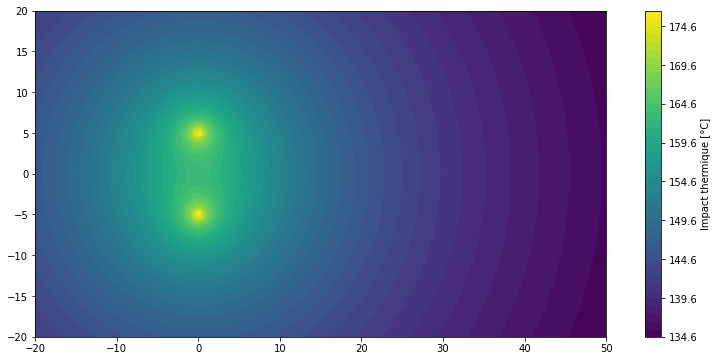

In [13]:

import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

# x,y: x-y coordinates [m]
# ro: borehole radius [m]
# z: vertical coordinate [m]
# H: borehole length [m]
# lm: bulk thermal conductivity [W/m/K]
# Cm: volumetric heat capacity of the porous medium [J/m3/K] 
# vT: heat transport velocity [m/s]
# t: simulation time [s]
# QL : heat flow rate per unit length of borehole [W/m]
# ax: longitudinal thermal dispersivity 
# ay: transverse thermal dispersivity
# Please note that there are some variables which are not used in the 
# current subfunction.

#creation fonction solution Moving Infinite Line Source (MILS): Diao et al. 2004 Sutton et al. 2004
def MILS_alph_ss(x,y,X0,Y0,ro,z,H,lm,Cm,vT,t,QL,ax,ay):
    alpha = 0 #angle ecoulement par rappor 0x
    kappa = lm/Cm;
    r = np.sqrt((x-X0) ** 2 + (y-Y0) ** 2)
    alpha_rad = -alpha*np.pi/180
    x = x - X0                                                          
    y = y - Y0 
    x = np.cos(alpha_rad)*x - np.sin(alpha_rad)*y                  
    y = np.sin(alpha_rad)*x + np.cos(alpha_rad)*y 
    return QL * (1 / 2 / 3.1415 / lm) * np.exp(vT * x / 2 / kappa) * sp.k0(vT * np.sqrt(x ** 2+y ** 2) / 2 /kappa)

# cartographie DT en permanent
#definition of your grid from Xmin to Xmax, and from Ymin to Ymax
Xmin = -20
Xmax = 50
xgrid_len = 140
Ymin = -20
Ymax = 20
ygrid_len = 80

#You create your grid of interest
xi = np.linspace(Xmin, Xmax, xgrid_len)                                    
yi = np.linspace(Ymin, Ymax, ygrid_len)                                    
xi, yi = np.meshgrid(xi, yi)

# position de la sonde
X1 = 0
Y1 = 5
X2 = 0
Y2 = -5

# parametres ecoulement aquifere
vhyd = 1e-2/86400 # vitesse ecoulement (m/s)
omega = 0.15 # porosite efficace

ro = 0.01 # borehole radius [m]
z = 20 # vertical coordinate [m]
H = 60 # borehole length [m]
lm = 1.6 # bulk thermal conductivity [W/m/K]
Cm = 2.4e6 #volumetric heat capacity of the porous medium [J/m3/K]
Cw = 4.2e6 #
Rt = Cm  / (Cw * omega)
vT = (vhyd/86400) / Rt #heat transport velocity [m/s]
t = 1e10 #simulation time [s]
QL = 60 # heat flow rate per unit length of borehole [W/m]
ax = 0 #longitudinal thermal dispersivity 
ay = 0 # transverse thermal dispersivity

#MILS_alph_ss(x,y,X0,Y0,ro,z,H,lm,Cm,vT,t,QL,ax,ay)
sonde1 = MILS_alph_ss(xi,yi,X1,Y1,ro,z,H,lm,Cm,vT,t,QL,ax,ay)
sonde2 = MILS_alph_ss(xi,yi,X2,Y2,ro,z,H,lm,Cm,vT,t,QL,ax,ay)
impact = sonde1 + sonde2
fig, axs = plt.subplots(1,1, figsize=(14,6))
cf = plt.contourf(xi,yi,impact,np.arange(impact.min(),impact.max(),1))
#plt.contourf(xi,yi,impact, np.arange(0,impact.max(),2), cmap ="jet")
#plt.contourf(xi,yi,impact, np.arange(0,100,2), cmap ="jet")

axs.set_aspect('equal')
fig.colorbar(cf, label = "Impact thermique [°C]")
plt.plot

print(Rt)
print(Cm  / Cw / omega)
print(vT)
print(sonde1.max())
print(sonde2.max())
print(impact.max())

La solution analytique calcule l'impact de la sonde en régime permanent. Hors la puissance linéique retenue pour chaque sonde corresponds à une extraction de 2400h/an.

Il faut recalculer une puissance linéique équivalente lissée sur une année moyenne pour utiliser la solution analytique.
On peut ensuite relancer la solution 2D pour les deux sondes.

16.43835616438356
3.8095238095238093
3.8095238095238093
3.038194444444444e-08
8.747651277837814
8.747651277837814
11.449314145319681
10.13795521196683


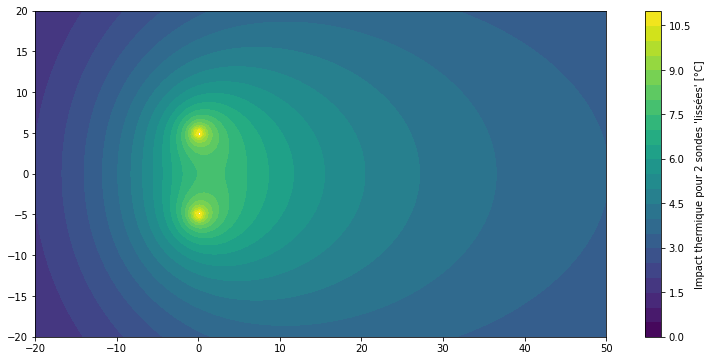

In [12]:
#creation fonction solution Moving Infinite Line Source (MILS): Diao et al. 2004 Sutton et al. 2004
def MILS_alph_ss(x,y,X0,Y0,ro,z,H,lm,Cm,vT,t,QL,ax,ay):
    alpha = 0 #angle ecoulement par rappor 0x
    kappa = lm/Cm;
    r = np.sqrt((x-X0) ** 2 + (y-Y0) ** 2)
    alpha_rad = -alpha*np.pi/180
    x = x - X0                                                          
    y = y - Y0 
    x = np.cos(alpha_rad)*x - np.sin(alpha_rad)*y                  
    y = np.sin(alpha_rad)*x + np.cos(alpha_rad)*y 
    return QL * (1 / 2 / 3.1415 / lm) * np.exp(vT * x / 2 / kappa) * sp.k0(vT * np.sqrt(x ** 2+y ** 2) / 2 /kappa)

# parametres ecoulement aquifere
u = 1e-2 #m/j
omega = 0.15 # porosite efficace

Xmin = -20
Xmax = 50
xgrid_len = 140
Ymin = -20
Ymax = 20
ygrid_len = 80

#You create your grid of interest
xi = np.linspace(Xmin, Xmax, xgrid_len)                                    
yi = np.linspace(Ymin, Ymax, ygrid_len)                                    
xi, yi = np.meshgrid(xi, yi)

# position de la sonde
X1 = 0
Y1 = 5
X2 = 0
Y2 = -5

ro = 0.01 # borehole radius [m]
z = 20 # vertical coordinate [m]
H = 60 # borehole length [m]
lm = 1.6 # bulk thermal conductivity [W/m/K]
Cm = 2.4e6 #volumetric heat capacity of the porous medium [J/m3/K]
Cw = 4.2e6 #
Rt = Cm  / (Cw * omega)
vT = (u/86400) / Rt #heat transport velocity [m/s]
t = 1e10 #simulation time [s]
ax = 0 #longitudinal thermal dispersivity 
ay = 0 # transverse thermal dispersivity

QL = 60 # heat flow rate per unit length of borehole [W/m] pour 2400 h/a
QLm = (QL) * (2400/ (24 * 365))

sonde1b = MILS_alph_ss(xi,yi,X1,Y1,ro,z,H,lm,Cm,vT,t,QLm,ax,ay)
sonde2b = MILS_alph_ss(xi,yi,X2,Y2,ro,z,H,lm,Cm,vT,t,QLm,ax,ay)
impactb = sonde1b + sonde2b
fig, axs = plt.subplots(1,1, figsize=(14,6))
cf = plt.contourf(xi,yi,impactb,np.arange(0,impactb.max(),0.5))
#plt.contourf(xi,yi,impact, np.arange(0,impact.max(),2), cmap ="jet")
#plt.contourf(xi,yi,impact, np.arange(0,100,2), cmap ="jet")

axs.set_aspect('equal')
fig.colorbar(cf, label = "Impact thermique pour 2 sondes 'lissées' [°C]")
plt.plot

print(QLm)
print(Cm  / Cw / omega)
print(Rt)
print(vT)
print(sonde1b.max())
print(sonde1b.max())
print(impactb.max())

test=MILS_alph_ss(15,0,X1,Y1,ro,z,H,lm,Cm,vT,t,QL,ax,ay)
print(test)

4. Estimer l'impact thermique à n point d'observation situé à 15 mètre à l'Est du champs de sondes thermique les 10 premières années d'exploitation

**Modèle MILS transitoire**
$$
T(x,y,t) = T_0 + \frac{q_{tb}}{4 \pi \lambda_m} exp\left[{\frac{v_t x}{16 D_t^2 \psi}}\right]\int_{r^2 / 4 D_t t}^{\infty} exp\left[{-\psi - \frac{v_t^2r^2}{2 D_t}}\right] \, \frac{\mathrm{d}\psi}{\psi}
$$

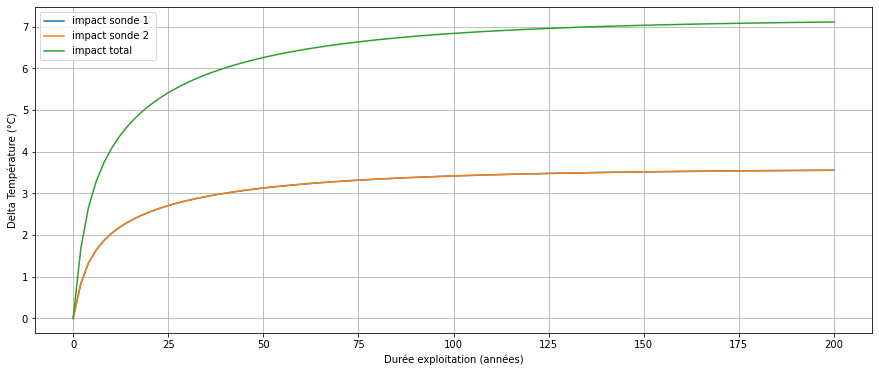

In [7]:
from scipy.integrate import quad  # Module d'intégration "quad"

import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
#import seaborn as sns

def MILS(x,y,X0,Y0,ro,z,H,lm,Cm,vT,t,QL,ax,ay):
    Dt = lm/Cm;
    r1 = ((x-X0) ** 2 + (y-Y0) ** 2)
    def kernel(psi):
        return (1/psi) * np.exp(-psi-vT ** 2 * r1 / 16 / Dt ** 2 / psi)
    return QL*(1/4/3.1415/lm) * np.exp(vT * x / 2 / Dt) * (quad(kernel,r1 / 4 / Dt /t,np.inf)[0])

# position de la sonde
X1 = 0
Y1 = 5
X2 = 0
Y2 = -5
# parametres ecoulement aquifere
u = 1e-2 #m/j
omega = 0.15 # porosite efficace

ro = 0.01 # borehole radius [m]
z = 20 # vertical coordinate [m]
H = 60 # borehole length [m]
lm = 1.6 # bulk thermal conductivity [W/m/K]
Cm = 2.4e6 #volumetric heat capacity of the porous medium [J/m3/K]
Cw = 4.2e6 #
vT = (u/86400) / Cm  * (Cw * omega) #heat transport velocity [m/s]
#t = 1e10 #simulation time [s]
ax = 0 #longitudinal thermal dispersivity 
ay = 0 # transverse thermal dispersivity

QL = 60 # heat flow rate per unit length of borehole [W/m] pour 2400 h/a
QLm = (QL) * (2400/ (24 * 365))

d = 5 #distance point observation (m)ATTENTION CALCULER DISTANCE AVEC COORDONNEES
t = np.linspace(0.01,200,100) #simulation time [annees]

DTt1 = []
DTt2 = []
DTt_total = []
for i in t:
    #DTt.append(MILS(r,0,0,0,0.01,50,100,2.7,2888000,0.0000003,i,100,0,0))
    DTt1.append(MILS(d,0,X1,Y1,ro,z,H,lm,Cm,vT,i * 86400 * 365,QLm,ax,ay))
    DTt2.append(MILS(d,0,X2,Y2,ro,z,H,lm,Cm,vT,i * 86400 * 365,QLm,ax,ay))

#DTt_1 = np.array([DTt1])
#DTt_2 = np.array([DTt2])
#time = np.array([t])
#DTt_total = DTt_1 + DTt_2
DTt_total = [sum(i) for i in zip(DTt1,DTt2)]

fig, ax = plt.subplots(figsize=(15, 6))
ax.set_ylabel('Delta Température (°C)')
ax.set_xlabel('Durée exploitation (années)')
ax.plot(t, DTt1, label='impact sonde 1 ')
ax.plot(t, DTt2, label='impact sonde 2 ')
ax.plot(t, DTt_total, label='impact total ')

#ax.plot(time, DTt_total, label='impact total')

ax.legend()
ax.grid()
plt.show()              


## Dimensionnement d'un dispositif de géothermie très basse énergie sur nappe ##

On considère un aquifère de transmissivité $T =$ 150 m2/s et d'épaisseur de 75 mètres. Le coefficient d'emmagasinement de l'aquifère est de l'ordre de 0.002. La porosité efficace est de 10%. Le gradient hydraulique ouest-est est de l'ordre de 0.01.

La capacité volumétrique moyenne de l'aquifère est $C_m$ = 2.3e6 J/m3/K et celle de l'eau est $C_w$ = 4.18e6 J/m3/K .

1. On considère un puits de rayon $r$ = 100 mm qui capte l'aquifère. Le puits est pompé durant 21 jours au débit de 25 L/s.
Quel est le rabattement attendu au puits à la fin de la période de pompage. Quelle critique peut on formuler sur ce résultat?

In [21]:
import numpy as np
import pandas as pd
import scipy.special as sp
import math as math
import matplotlib.pyplot as plt

#conditions de l'essai
Q = 10 # débit (L/s)
rw = 100e-3/2  # distance piézomètre/puits (m) --> rayon puits
t = 21 # (j)
#aquifère
T = 150 #m2/j
S = 2e-3 # (-)

#cohenrece unités
Q = Q * 1e-3 * 24 *3600 #m3/j

## rabattement s_rw formule theis
s_theis_rw = Q / (4 * np.pi * T) * sp.exp1((rw ** 2 * S)/ (4 * T * t))
print("Rabattement au puits de pompage (Theis) {:.2e}".format(s_theis_rw),"mètres")

##rabattement formule jacob + verif u
s_jacob_rw = 2.3 * Q / (4 * np.pi * T) * np.log10((2.25 * T * t) / (rw ** 2 * S))
print("Rabattement au puits de pompage (Jacob) {:.2e}".format(s_jacob_rw),"mètres")




Rabattement au puits de pompage (Theis) 9.66e+00 mètres
Rabattement au puits de pompage (Jacob) 9.65e+00 mètres


2. L'eau prélevée est réinjectée dans un puits situé à $d$ = 100 mètres en aval hydraulique du puits de pompage. Quel rabattement est envisageable au puits de pompage après 3 semaine d'exploitation du doublet?


In [23]:
import numpy as np
import pandas as pd
import scipy.special as sp
import math as math
import matplotlib.pyplot as plt

#aquifère
T = 150 #m2/j
S = 2e-3 # (-)

#conditions de l'essai
Q = 10 # débit (L/s)
rw = 100e-3/2  # distance piézomètre/puits (m) --> rayon puits
t = 21 # (j)
#cohenrece unités
Q = Q * 1e-3 * 24 *3600 #m3/j

# distance entre 2 ouvrages = 100m
d1 = 100 #distance puits reinjection (m)

rw = 100e-3/2  # distance piézomètre/puits (m) --> rayon puits
d1 = 100 #distance puits reinjection (m)
t = 21 # (j)

# puits de pompage
s_out = 2.3 * Q / (4 * np.pi * T) * np.log10((2.25 * T * t) / (rw ** 2 * S))
#puits d'injection à d
s_in1 = 2.3 * -Q / (4 * np.pi * T) * np.log10((2.25 * T * t) / (d1 ** 2 * S))
s_total_rw = s_out + s_in1
print("Rabattement total au puits de pompage (Jacob) {:.2e}".format(s_total_rw),"mètres")
print(s_out)
print(s_in1)

Rabattement total au puits de pompage (Jacob) 6.96e+00 mètres
9.647923121140815
-2.687751926987864


Réaliser une carte d'impact hydraulique rabattement + gradient hydraulique?

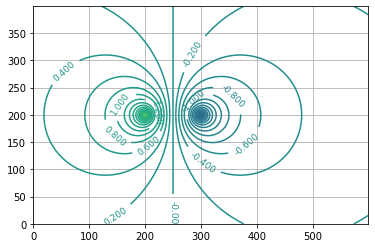

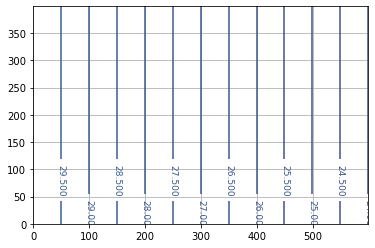

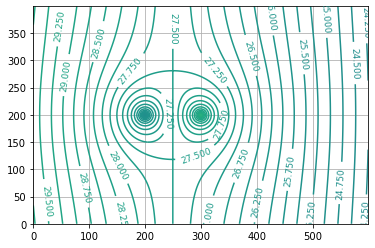

In [30]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

Q = 10 # débit (L/s)
rw = 100e-3/2  # distance piézomètre/puits (m) --> rayon puits
t = 21 # (j)

#aquifère
T = 150 #m2/j
S = 2e-3 # (-)

#cohenrece unités
Q = Q * 1e-3 * 24 *3600 #m3/j

#creation d'une grille de calcul 600 x 600
x = np.linspace(0,600,600)
y = np.linspace(0,400,400)
X, Y = np.meshgrid(x, y)

#champ captant
x_Fout = 200 # m
y_Fout = 200 #
x_Fin = 300 #
y_Fin = 200 #
Qout = Q #m3/h
Qin = -Q #m3/h
t = 21 # duree pompage/injection(j)

#Impact - calcul avec la fonction de Theis
r_Fout = np.sqrt((X-x_Fout) ** 2 + (Y-y_Fout) ** 2)
u_Fout = r_Fout**2. * S / (4 * (T) * (t))
s_Fout = Qout/(4 * np.pi * (T)) * sp.exp1(u_Fout)

r_Fin = np.sqrt((X-x_Fin) ** 2 + (Y-y_Fin) ** 2)
u_Fin = r_Fin**2. * S / (4 * (T) * (t))
s_Fin = Qin/(4 * np.pi * (T)) * sp.exp1(u_Fin)

level = np.arange(-10,10,0.2) #valeur des iso (min,max,delta)
map = plt.contour(s_Fout+s_Fin,level)
plt.clabel(map, fontsize=9, inline=1)
plt.grid()
plt.show()

#carte piézométrique initiale
#ecoulement naturel
H = 30 # H (mNG) de reference
H1 = H - 1e-2 * X #gradient regional  orienté ouest-est

level = np.arange(0,100,0.5) #valeur des iso (min,max,delta)
map = plt.contour(H1,level)
plt.clabel(map, fontsize=9, inline=1)
plt.grid()
plt.show()

#carte piézométrique impactée
h = H1 - s_Fout -s_Fin
level = np.arange(0,50,0.25) #valeur des iso (min,max,delta)
map = plt.contour(h,level)
plt.clabel(map, fontsize=9, inline=1)
plt.grid()
plt.show()

3. Caractérisation thermique et hydraulique du doublet

- fraction recyclage hydraulique
$$
f_{hyd} =1 - \frac{2}{\pi}\left[ {tan^{-1} \left( {\frac{1}{\sqrt{\beta - 1}}} + \frac{\sqrt{\beta - 1}}{\beta} \right)} \right]
$$
- temps d'arrivée front hydraulique au puits $t^F_{hyd}$:
$$
t^F_{hyd} = \frac{n_e d}{K i}\left[ {\frac{\beta}{\sqrt{\beta-1}}} tan^{-1} \left( {\frac{1}{\sqrt{\beta - 1}}} \right) -1 \right]
$$
- temps d'arrivée front thermique au puits $t^F_{hyd}$:
$$
t_{the} = \frac{C_{aq}}{C_w} \frac{d}{K i}\left[ {\frac{\beta}{\sqrt{\beta - 1}}} tan^{-1} \left( {\frac{1}{\sqrt{\beta - 1}}} \right) - 1 \right]
$$


In [2]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

Cm = 2.4e6 #volumetric heat capacity of the porous medium [J/m3/K] 
Cw = 4.18e6 #capacite thermique volumetrique eau [J/K/m3]

omega = 10e-2 #porosite efficace
i = 1e-2 #gradient hydraulique W-E
Q = 10 # débit (L/s)
rw = 100e-3/2  # distance piézomètre/puits (m) --> rayon puits

d = 100 #distance doublet metre

#aquifère
T = 150 #m2/j
b = 75 # (m)
K = T / b # m/j

#cohenrece unités SI
Q = Q * 1e-3 * 24 * 3600 #m3/j

#CALCUL AVEC GRADIENT HYDRAULIQUE
# si beta > 1 alors recyclage
beta = 2 * Q / (T * np.pi * i * d)

#temps d'arrivee front hydraulique au puits avec gradient regional (jour)
tF_hyd = (d * omega / K / i) * ((beta / np.sqrt(beta - 1)) * np.arctan(1 / np.sqrt(beta - 1)) - 1)
print("temps d'arrivée front hydraulique {:.2e}".format(tF_hyd),"jours")

#temps d'arrivee thermique au puits avec gradient regional (jour)
tF_therm = (Cm / Cw) * (d / K / i) * ((beta / np.sqrt(beta - 1)) * np.arctan(1 / np.sqrt(beta - 1)) - 1)
print("temps d'arrivée front thermique {:.2e}".format(tF_therm),"jours")

#FRACTION RECYCLAGE HYDRAULIQUE
f_hyd = 1 -(2 / np.pi)*((np.arctan(1 / np.sqrt(beta - 1))) + (np.sqrt(beta - 1)) / beta)

print("fraction de recyclage hydraulique {:.1e}".format(f_hyd * 100),"%")



temps d'arrivée front hydraulique 1.17e+02 jours
temps d'arrivée front thermique 6.71e+02 jours
fraction de recyclage hydraulique 3.7e+01 %


- Evolution température au puits de pompage post-percée thermique

temps d'arrivée front thermique 6.71e+02 jours


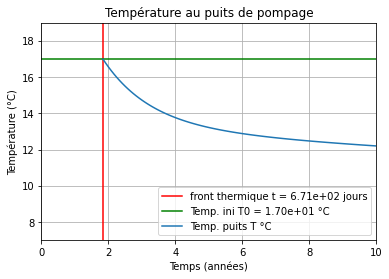

In [4]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

Cm = 2.4e6 #volumetric heat capacity of the porous medium [J/m3/K] 
Cw = 4.18e6 #capacite thermique volumetrique eau [J/K/m3]

omega = 10e-2 #porosite efficace
i = 1e-2 #gradient hydraulique W-E
Q = 10 # débit (L/s)
rw = 100e-3/2  # distance piézomètre/puits (m) --> rayon puits

d = 100 #distance doublet metre

#aquifère
T = 150 #m2/j
b = 75 # (m)
K = T / b # m/j

#temperature
theta_0 = 17 # °C temperature initiale aquifere
theta_inj = 7 # °C temperature reinjection

#cohenrece unités SI
Q = Q * 1e-3 * 24 * 3600 #m3/j

#CALCUL SANS GRADIENT HYDRAULIQUE
#temps arrivee front thermique
#t_the = np.pi * b * d ** 2 /3 * Cm / Cw / Q # sans ecoulement regional
t_the = (Cm / Cw) * (d / K / i) * ((beta / np.sqrt(beta - 1)) * np.arctan(1 / np.sqrt(beta - 1)) - 1) #avec ecoulement regional

print("temps d'arrivée front thermique {:.2e}".format(tF_therm),"jours")

#evolution temperature post-percee au puits de pompage
# temps doit etre en années
t = np.linspace(t_the/365,10,100)

t_out = (0.338 * np.exp(-0.0023*(t/(t_the/365))) + 0.337 * np.exp(-0.1093 * t/(t_the/365))
         + 1.368 * np.exp(-1.3343*t/(t_the/365))) * (theta_0 - theta_inj) + theta_inj

plt.title('Température au puits de pompage')
plt.xlabel('Temps (années)')
plt.xlim(0, 10)
plt.ylim(theta_inj, theta_0 + 2)
plt.ylabel('Température (°C)')
plt.grid()
plt.axvline(x=t_the/365, color = 'red', label='front thermique t = {:.2e} jours'.format(t_the))
plt.axhline(y=theta_0, color = 'green', label='Temp. ini T0 = {:.2e} °C'.format(theta_0))

plt.plot(t,t_out, label='Temp. puits T °C')
plt.legend()
plt.show()

3. L'aquifère précédent a une épaisseur de 75 mètres. Le gradient hydraulique ouest-est est de l'ordre de 0.01. On injecte un traceur chimique dans le puits de ré-injection. Dans ce puits, l'eau injectée au puits de reinjection est chauffée de 10°C. Au bout de combien de temps le traceur atteindra un piézométre situé à 150 mètres dans le sens de l'écoulement. Combien de temps mettra le front thermique à atteindre ce piézomètre?



In [5]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

Cm = 2.4e6 #volumetric heat capacity of the porous medium [J/m3/K] 
Cw = 4.18e6 #capacite thermique volumetrique eau [J/K/m3]

#aquifère
T = 150 #m2/j
b = 75 # (m)
K = T / b # m/j
omega = 10e-2 #porosite efficace
i = 1e-2 #gradient hydraulique W-E

#dispositif
Q = 10 # débit (L/s)
rw = 100e-3/2  # distance piézomètre/puits (m) --> rayon puits
d_p = 150 #distance piezometre

#cohenrece unités SI
Q = Q * 1e-3 * 24 * 3600 #m3/j

#vD vitesse, Darcy m/j
vD = (T/b) * i
#u vitesse reelle m/j
u = vD/omega

#duree apparition du traveur à d piezometre (secondes)
t_hyd = d / u #jours
print("temps d'arrivée front hydraulique {:.2e}".format(t_hyd),"jours")

#facteur de retard thermique
R_t = (Cm / (omega * Cw))
#duree apparition front thermique (secondes)
t_therm = R_t * t_hyd
print("temps d'arrivée front thermique {:.2e}".format(t_therm),"jours")


temps d'arrivée front hydraulique 5.00e+02 jours
temps d'arrivée front thermique 2.87e+03 jours


## Fonctionnement standard d'un doublet - FEFLOW ##

### Comparaison modèle FEFLOW avec solutions analytiques

Le modèle conceptuel utilisé est inspiré des hypothèses de [ *Pophillat, W., Attard, G., Bayer, P., Hecht-Méndez, J., & Blum, P. (2020). Analytical solutions for predicting thermal plumes of groundwater heat pump systems. Renewable Energy, 147, 2696-2707.*]
Il présente les caractéristiques suivantes:

**Aquifère**
- Aquifère captif homogène;
- Epaisseur constante $b =$ 10 mètres;
- Conductivité hydrauliqiue $K =$ 1e-5 m/s;
- Porosité efficace $n_e =$ 0.3;
- Gradient hydraulique régional $i =$ 5e-3;

**Thermique**
- Conductivité thermique aquifère $l_m =$ 2.24 W/m/K
- Conductivité thermique éponte $l_s =$ 4 W/m/K
- Conductivité thermique fluide $l_w =$ 0.578 W/m/K
- Capacité thermique volumique aquifère $C_m =$ 2.88.2e6 J/m3/K  
- Capacité thermique volumique éponte $C_s =$ 2.332e6 J/m3/K  
- Capacité thermique volumique fluide $C_w =$ 4.2e6 J/m3/K  
- Dispersivité thermique longituditunale $\alpha_L =$ 1 m
- Dispersivité thermique transversale $\alpha_T =$ 0.1 m


**Doublet**
- espacement $L =$ 80 m
- Débit pompage / injection $+- Q =$ L/s




In [ ]:
#code source ATTARD

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.special import erf,erfc,erfcinv

def LAHT(x, y, X0, Y0, alpha, t, Qinj, DTinj,
         b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m):
    R = C_m/n/C_w
     
    alpha_rad = -alpha*np.pi/180
    x = x - X0                                                          
    y = y - Y0 
     
    x = np.cos(alpha_rad)*x - np.sin(alpha_rad)*y                  
    y = np.sin(alpha_rad)*x + np.cos(alpha_rad)*y 
     
    rp = np.sqrt(x**2+y**2*alpha_L/alpha_T)
    res = Qinj*DTinj/(4*n*b*va*np.sqrt(np.pi*alpha_T))*\
    np.exp((x-rp)/2/alpha_L)*(1/np.sqrt(rp))*\
    erfc((rp-va*t/R)/(2*np.sqrt(va*alpha_L*t/R)))
    return res

#definition of your grid from Xmin to Xmax, and from Ymin to Ymax
Xmin = -50
Xmax = 100
xgrid_len = 150
 
Ymin = -50
Ymax = 50
ygrid_len = 100
 
#You create your grif of interest
xi = np.linspace(Xmin, Xmax, xgrid_len)                                    
yi = np.linspace(Ymin, Ymax, ygrid_len)                                    
xi, yi = np.meshgrid(xi, yi)

C_m = float(2888000) #volumetric heat capacity porous media (J/ kg / K)
C_w = float(4185000) #volumetric heat capacity water (J/ kg / K)
alpha_L = float(10) #longitudinal dispersivity (m)
alpha_T = float(1) #transverse dispersivity (m)
lambda_m = float(2.24) #thermal conductivity (W/m/K)
 
alpha = float(0) # groundwater flow angle
K = float(0.0001) #permeability (m/s)
b = float(10) #aquifer thickness [m]
grad_h = float(0.005) #hydraulic gradient
n = float(0.3) #effective porosity
 
v0 = K*grad_h #darcy velocity
va = v0/n #seepage velocity
R = C_m/(n*C_w) #retardation factor
 
#We also define the location of the hot water injection
X0, Y0 = 0, 0
DTinj = 7. #temperature difference between pumping and reinjection
Qinj = 0.00005 #injection rate m3/s
time = 3600*24*3600 # operation time in seconds (365 days)

deltaT_laht = LAHT(xi, yi, X0, Y0, alpha, time, Qinj, DTinj, b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m)

#We define the titles of our subplots
titles =['Linear model']
   
fig, ax = plt.subplots(1,1, figsize=(23,6))
ax.set_title(titles)
ax.axis('equal')
cf= ax.contourf(xi, yi, deltaT_laht, cmap='viridis') # analytical contour (1 K disturbance)
fig.colorbar(cf, label = "Temperature disturbance [K]")

ax.grid(color='black', linestyle='-', linewidth=0.1)
ax.scatter(X0, Y0, color='red', label = 'Injection point')   
ax.set_xlim(0, 50)
ax.set_ylim(-50, 50)
ax.legend()
    
plt.show()

In [ ]:
#code source ATTARD

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.special import erf,erfc,erfcinv

def LAHT(x, y, X0, Y0, alpha, t, Qinj, DTinj,
         b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m):
    R = C_m/n/C_w
     
    alpha_rad = -alpha*np.pi/180
    x = x - X0                                                          
    y = y - Y0 
     
    x = np.cos(alpha_rad)*x - np.sin(alpha_rad)*y                  
    y = np.sin(alpha_rad)*x + np.cos(alpha_rad)*y 
     
    rp = np.sqrt(x**2+y**2*alpha_L/alpha_T)
    res = Qinj*DTinj/(4*n*b*va*np.sqrt(np.pi*alpha_T))*\
    np.exp((x-rp)/2/alpha_L)*(1/np.sqrt(rp))*\
    erfc((rp-va*t/R)/(2*np.sqrt(va*alpha_L*t/R)))
    return res

#definition of your grid from Xmin to Xmax, and from Ymin to Ymax
Xmin = -100
Xmax = 100
xgrid_len = 200
 
Ymin = -100
Ymax = 100
ygrid_len = 200
 
#You create your grif of interest
xi = np.linspace(Xmin, Xmax, xgrid_len)                                    
yi = np.linspace(Ymin, Ymax, ygrid_len)                                    
xi, yi = np.meshgrid(xi, yi)

C_m = float(2888000) #volumetric heat capacity porous media (J/ kg / K)
C_w = float(4185000) #volumetric heat capacity water (J/ kg / K)
alpha_L = float(5) #longitudinal dispersivity (m)
alpha_T = float(0.5) #transverse dispersivity (m)
lambda_m = float(2.24) #thermal conductivity (W/m/K)
 
alpha = float(45) # groundwater flow angle
K = float(0.001) #permeability (m/s)
b = float(10) #aquifer thickness [m]
grad_h = float(0.0001) #hydraulic gradient
n = float(0.2) #effective porosity
 
v0 = K*grad_h #darcy velocity
va = v0/n #seepage velocity
R = C_m/(n*C_w) #retardation factor
 
#We also define the location of the hot water injection
X0, Y0 = 20, 20
DTinj = 7. #temperature difference between pumping and reinjection
Qinj = 0.0001 #injection rate m3/s
time = 365*24*3600 # operation time in seconds (365 days)

deltaT_laht = LAHT(xi, yi, X0, Y0, alpha, time, Qinj, DTinj, b, va, n, C_m, C_w, alpha_L, alpha_T, lambda_m)

#We define the titles of our subplots
titles =['Linear model']
 
  
fig, ax = plt.subplots(1,1, figsize=(23,6))
ax.set_title(titles)
ax.axis('equal')
cf= ax.contourf(xi, yi,deltaT_laht, [1,2,3,4,5,6,7,8,9,10], cmap='viridis') # analytical contour (1 K disturbance)
fig.colorbar(cf, label = "Temperature disturbance [K]")

ax.grid(color='black', linestyle='-', linewidth=0.1)
ax.scatter(X0, Y0, color='red', label = 'Injection point')   
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.legend()
    
plt.show()